In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
df.columns.to_list()[:-1]

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [6]:
features = ['longitude','latitude','housing_median_age','total_rooms',\
            'total_bedrooms','population','households','median_income', 'median_house_value']
df = df[features]

## Exploratory data analysis

Text(0.5, 1.0, 'Distribution of prices')

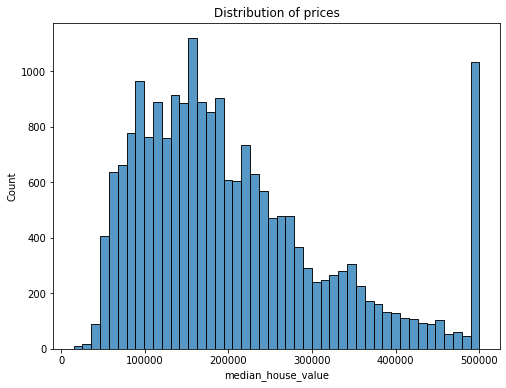

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['median_house_value'])
plt.title('Distribution of prices')

Text(0.5, 1.0, 'Distribution of prices after log tranformation')

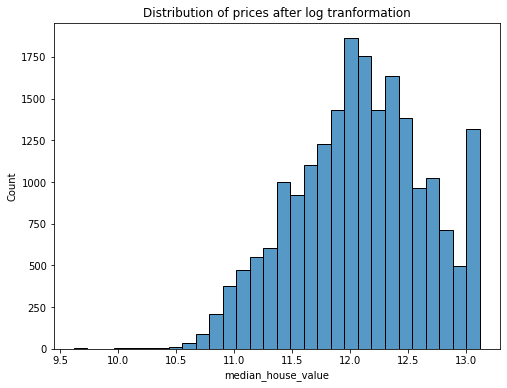

In [8]:
log_median_house_value = np.log1p(df.median_house_value)
plt.figure(figsize=(8, 6))
sns.histplot(log_median_house_value, bins=30)
plt.title('Distribution of prices after log tranformation')

In [9]:
# Homework question 1
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

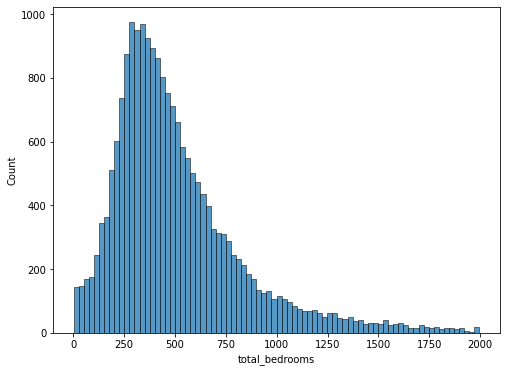

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['total_bedrooms'][df['total_bedrooms'] < 2000])

In [11]:
# Homework question 2
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
df.population.median()

1166.0

## Split the data

In [13]:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [14]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [15]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [16]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [17]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [18]:
df_train.shape, df_val.shape, df_test.shape

((12384, 8), (4128, 8), (4128, 8))

In [19]:
y_train.shape, y_val.shape, y_test.shape

((12384,), (4128,), (4128,))

In [20]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


## Simple feature engineering

In [21]:
def prepare_X(df):
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X

In [22]:
def prepare_X_mean(df):
    df = df.copy()
    df = df.fillna(df.total_bedrooms.mean())
    X = df.values
    return X

In [23]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [24]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [25]:
# Homework question 3
X_train_zero = prepare_X(df_train)
X_train_mean = prepare_X_mean(df_train)

In [26]:
X_val_zero = prepare_X(df_val)
X_val_mean = prepare_X_mean(df_val)

In [27]:
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
w0_zero, w_zero

(-11.686975241722369,
 array([-2.76255120e-01, -2.82087184e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

In [28]:
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)
rmse_zero = round(rmse(y_val, y_pred_zero), 2)
print('rmse by filling with zero:', rmse_zero)

rmse by filling with zero: 0.33


In [29]:
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

In [30]:
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)
rmse_mean = round(rmse(y_val, y_pred_mean), 2)
print('rmse by filling with mean:', rmse_mean)

rmse by filling with mean: 0.33


## Regularization

In [31]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [32]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [33]:
# Homework question 4
rmse_score = []
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    rmse_score.append((r, round(rmse(y_val, y_pred), 2)))
    print(f'r = {r}, rmse = {round(rmse(y_val, y_pred), 2)}')

r = 0, rmse = 0.33
r = 1e-06, rmse = 0.33
r = 0.0001, rmse = 0.33
r = 0.001, rmse = 0.33
r = 0.01, rmse = 0.33
r = 0.1, rmse = 0.33
r = 1, rmse = 0.33
r = 5, rmse = 0.34
r = 10, rmse = 0.34


## Influence of the seed for splitting the data on the RMSE score

In [34]:
def split_train_val_test(df, seed):
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    np.random.seed(seed)
    
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()

    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [35]:
# Homework question 5
rmse_score = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seeds:
    df_train, df_val, df_test, y_train, y_val, y_test = split_train_val_test(df, seed)
    
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)
    
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    rmse_score.append(round(rmse(y_val, y_pred), 3))
    print(f'seed = {seed}, rmse = {rmse_score[-1]}')
print(f'std(rmse_score) = {round(np.std(rmse_score), 3)}')

seed = 0, rmse = 0.339
seed = 1, rmse = 0.336
seed = 2, rmse = 0.332
seed = 3, rmse = 0.341
seed = 4, rmse = 0.339
seed = 5, rmse = 0.343
seed = 6, rmse = 0.345
seed = 7, rmse = 0.34
seed = 8, rmse = 0.347
seed = 9, rmse = 0.337
std(rmse_score) = 0.004


In [36]:
# Homework question 6
df_train, df_val, df_test, y_train, y_val, y_test = split_train_val_test(df, 9)

In [37]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop = True)
X_full_train = prepare_X(df_full_train)

In [38]:
y_full_train = np.concatenate([y_train, y_val])

In [39]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [40]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
print('rmse:', round(rmse(y_test, y_pred), 2))

rmse: 0.35
